# A Whale off the Port(folio)

In [2]:
# Initial Imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

## Data Cleaning
### Whale Returns
#### Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# Use the file path to read the CSV into a DataFrame and display a few rows
whale_returns_df = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True,)
whale_returns_df = whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Use the `dropna` function to drop whole records that have at least one null value
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.head()
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

### Algorithmic Daily Returns
#### Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
# Use the file path to read the CSV into a DataFrame
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date",infer_datetime_format=True, parse_dates=True)
algo_returns_df = algo_returns_df.sort_index()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Use the `isnull` function  to view count of null values for each column
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Use the `dropna` function to drop whole records that have at least one null value
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.head()
# Use the `isnull` function in conjunction with the `sum` function to count the number of null values for each column
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

### S&P 500 Returns
#### Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data.

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
# Use the file path to read the CSV into a DataFrame and display a few rows
sp500_history_df = pd.read_csv(sp500_history_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
# Sort ascending (default)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,"$1,444.49"
2012-10-02,"$1,445.75"
2012-10-03,"$1,450.99"
2012-10-04,"$1,461.40"
2012-10-05,"$1,460.93"


In [10]:
## Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [11]:
# Clean identified numeric fields with $ symbol
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace(',', '')
sp500_history_df.head()


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
# Convert `Close` from `object` to `float`
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [15]:
# Calculate the daily return using the 'pct_change()' function
daily_returns = sp500_history_df.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [17]:
# Use the `dropna` function to drop whole records that have at least one null value
daily_returns.dropna().copy()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [18]:
# Rename Column
daily_returns = daily_returns.rename(columns={
    "Close": "S&P 500"
})

daily_returns.head()

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


### Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
joined_data = pd.concat([whale_returns_df,algo_returns_df,daily_returns], axis='columns', join='inner')
joined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


### Portfolio Analysis
####  Performance

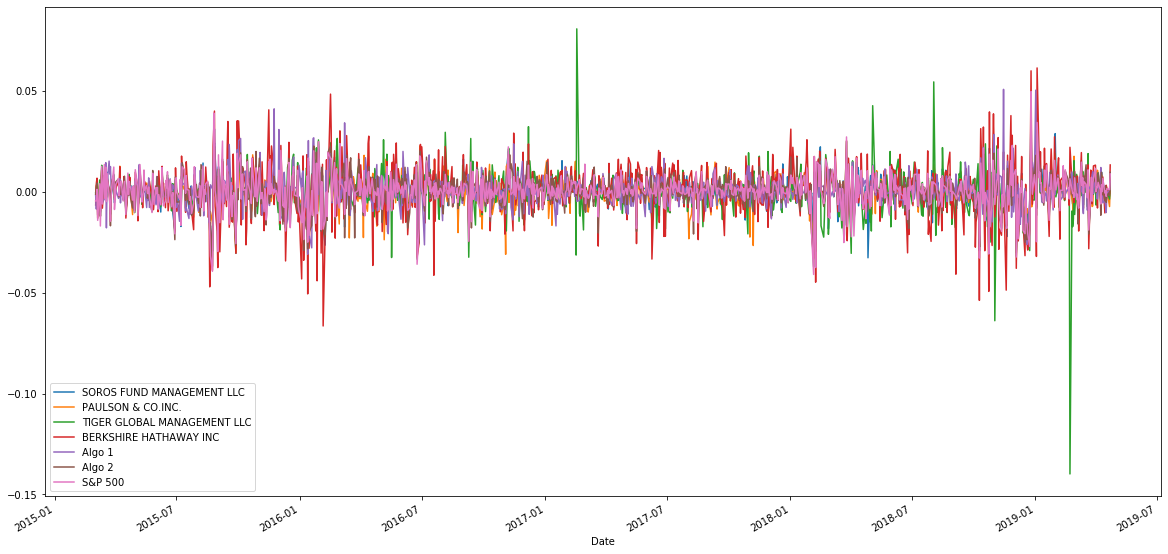

In [20]:
# Calculate Daily Returns
joined_data.plot(figsize=(20,10))

### Calculate Cumulative Returns

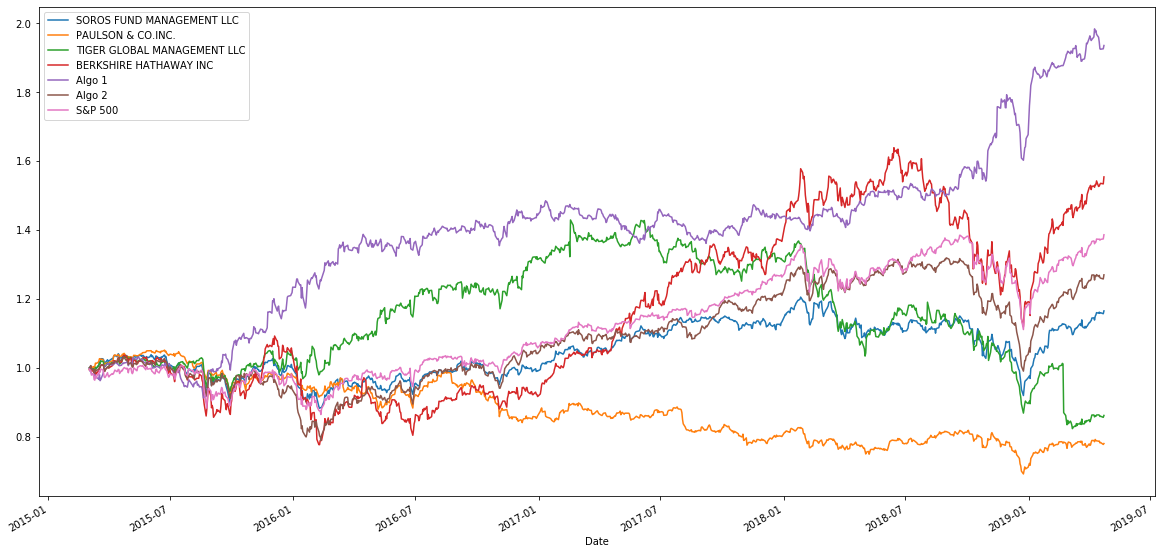

In [22]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + joined_data).cumprod()
cumulative_returns.plot(figsize=(20,10))

### Risk

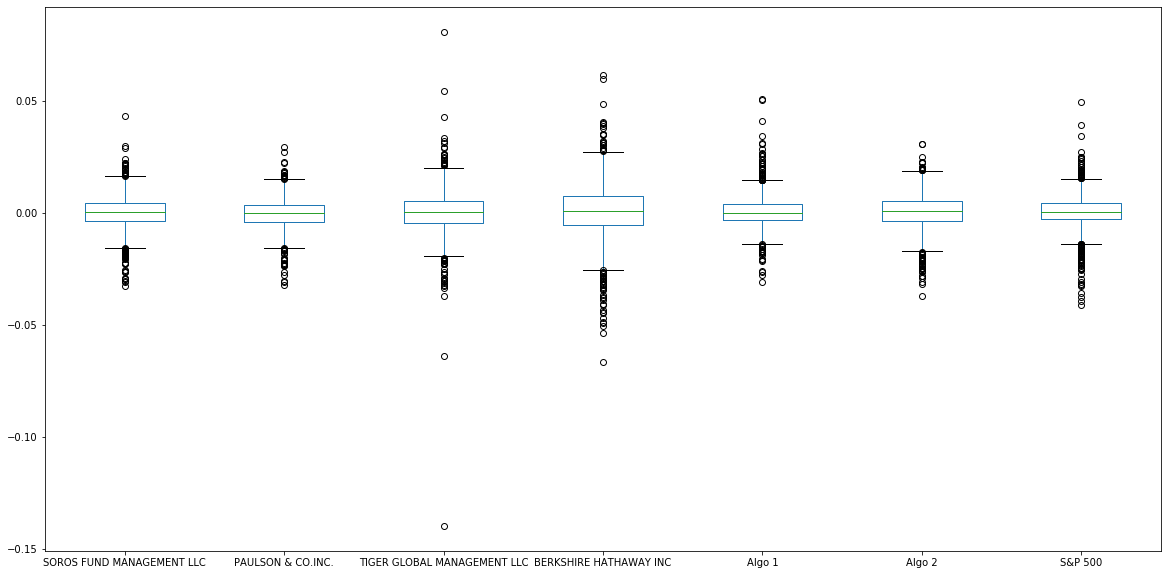

In [23]:
# Box plot to visually show risk
joined_data.plot.box(figsize=(20,10))

In [24]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
all_returns_std = joined_data.std()

all_returns_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64